In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
 #从datasets中间导出高斯分位点
from sklearn.datasets import make_gaussian_quantiles  
from sklearn.preprocessing import PolynomialFeatures

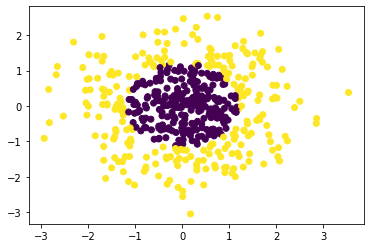

In [2]:
#生成2维正态分布，生成的数据按分位数分为两类，500个样本，2个样本特征
#可以生成两类或多类数据

x_data,y_data = make_gaussian_quantiles(n_samples=500,n_features=2,n_classes=2)

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [3]:
logistic = linear_model.LogisticRegressionCV()
logistic.fit(x_data,y_data)

LogisticRegressionCV()

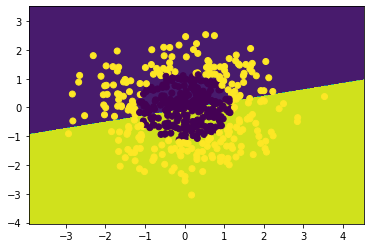

score: 0.522


In [4]:
# 获取数据值所在的范围
# 计算下矩形框的大小
# 通过.min和.max生成xy的最小值最大值
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array， 
# np.c_按colunm来组合array
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])

# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_data,y_data))
#使用线性预测准确率50%

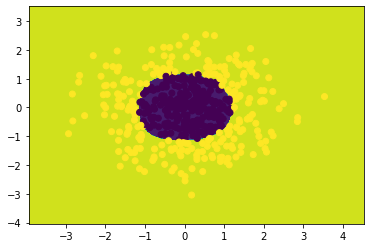

score: 0.99


In [7]:
# 定义多项式回归，degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_data)

logistic = linear_model.LogisticRegression()
logistic.fit(x_poly,y_data)

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array， 
# np.c_按colunm来组合array
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])

# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_poly,y_data))
#98.8的准确率